# 1. Initial Data Loading

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%matplotlib inline

In [3]:
# loading 2015, 2016 and 2017 three datasets to begin data analysis

accident2016 = pd.read_csv("./FARS2016NationalCSV/accident.csv")
accident2017 = pd.read_csv("./FARS2017NationalCSV/accident.csv")
accident2015 = pd.read_csv("./FARS2015NationalCSV/accident2015.csv")

# 2. Compare # of Accidents by Month

In [8]:
# Conduct sanity check on MONTH columns in 2015, 2016 and 2017 data
accident2016.columns
accident2016.MONTH.describe()
accident2016.MONTH.unique()

accident2017.columns
accident2017.MONTH.describe()
accident2017.MONTH.unique()

accident2015.columns
accident2015.month_of_crash.describe()
accident2015.month_of_crash.unique()

array([ 1, 12, 10,  5, 11,  7,  8,  6,  9,  3,  4,  2])

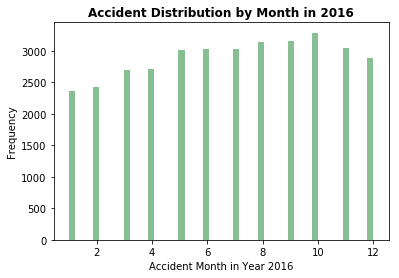

In [56]:
# Initial plotting using histogram to depict 2016 accident distribution by month

accident2016.hist(column='MONTH', bins=50, grid=False, color='#86bf91')
plt.xlabel("Accident Month in Year 2016", size=10)
plt.ylabel("Frequency", size=10)
plt.title('Accident Distribution by Month in 2016', size=12, weight='bold')

In [85]:
# Compare Accident Counts by Month throughout 2015, 2016 and 2017
# Group by Month, and Calculate accident counts

df2016 = accident2016.groupby(accident2016.MONTH).agg({'MONTH':'count'})
df2016.columns = ['Accident_Count_2016']

df2015 = accident2015.groupby(accident2015.month_of_crash).agg({'month_of_crash':'count'})
df2015.columns = ['Accident_Count_2015']

df2017 = accident2017.groupby(accident2017.MONTH).agg({'MONTH':'count'})
df2017.columns = ['Accident_Count_2017']

In [86]:
df2016 = df2016.reset_index()
df2017 = df2017.reset_index()
df2015 = df2015.reset_index()
df2015 = df2015.rename(columns = {'month_of_crash':'MONTH'})
df2015

,MONTH,Accident_Count_2015
0,1,2371
1,2,1983
2,3,2401
3,4,2439
4,5,2869
5,6,2790
6,7,3021
7,8,3049
8,9,2904
9,10,3070


In [87]:
# Combine relevant columns from 2015 to 2017 three datasets into one dataframe

df_combined = pd.merge(pd.merge(df2017,df2016,on='MONTH'),df2015,on='MONTH')
df_combined

,MONTH,Accident_Count_2017,Accident_Count_2016,Accident_Count_2015
0,1,2616,2354,2371
1,2,2302,2426,1983
2,3,2686,2694,2401
3,4,2743,2713,2439
4,5,2896,3005,2869
5,6,3015,3025,2790
6,7,3226,3025,3021
7,8,2964,3134,3049
8,9,3068,3154,2904
9,10,3064,3287,3070


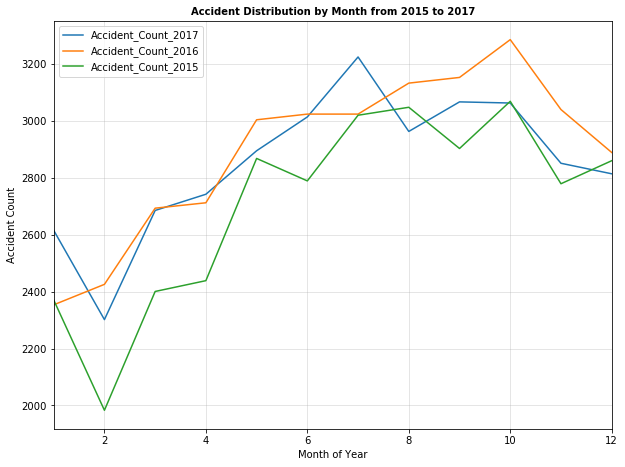

In [88]:
fig = df_combined.plot.line(x='MONTH', figsize=(10,7.5))
fig.set_xlabel('Month of Year',fontsize=10)
fig.set_ylabel('Accident Count',fontsize=10)
# fig.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.25)
fig.grid(alpha=0.4)
plt.title('Accident Distribution by Month from 2015 to 2017', size=10, weight='bold')
plt.show()

# 3. Compare # of Accidents by Day of Week

In [14]:
# Conduct sanity check on Day of Week columns in 2015, 2016 and 2017 data
accident2016.columns
accident2016.DAY_WEEK.describe()
accident2016.DAY_WEEK.unique()

accident2017.columns
accident2017.DAY_WEEK.describe()
accident2017.DAY_WEEK.unique()

accident2015.columns
accident2015.day_of_week.describe()
accident2015.day_of_week.unique()

array([1, 2, 5, 4, 6, 7, 3])

In [94]:
# Compare Accident Counts by Day of Week throughout 2015, 2016 and 2017
# Group by Day of Week, and Calculate accident counts

df2016 = accident2016.groupby(accident2016.DAY_WEEK).agg({'DAY_WEEK':'count'})
df2016.columns = ['Accident_Count_2016']

df2017 = accident2017.groupby(accident2017.DAY_WEEK).agg({'DAY_WEEK':'count'})
df2017.columns = ['Accident_Count_2017']

df2015 = accident2015.groupby(accident2015.day_of_week).agg({'day_of_week':'count'})
df2015.columns = ['Accident_Count_2015']

In [95]:
df2016 = df2016.reset_index()
df2017 = df2017.reset_index()
df2015 = df2015.reset_index()
df2015 = df2015.rename(columns = {'day_of_week':'DAY_WEEK'})
df2015

,DAY_WEEK,Accident_Count_2015
0,1,5298
1,2,4038
2,3,3985
3,4,4182
4,5,4460
5,6,4916
6,7,5659


In [96]:
# Combine relevant columns from 2015 to 2017 three datasets into one dataframe

df_combined = pd.merge(pd.merge(df2017,df2016,on='DAY_WEEK'),df2015,on='DAY_WEEK')
df_combined

,DAY_WEEK,Accident_Count_2017,Accident_Count_2016,Accident_Count_2015
0,1,5360,5353,5298
1,2,4374,4537,4038
2,3,4347,4157,3985
3,4,4314,4439,4182
4,5,4621,4706,4460
5,6,5358,5397,4916
6,7,5873,6159,5659


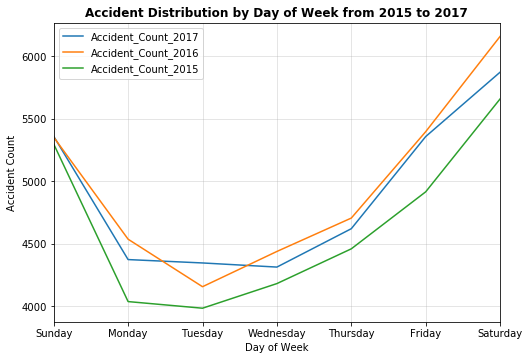

In [100]:
# Plotting 3 years trending in one figure

fig = df_combined.plot.line(x='DAY_WEEK', figsize=(8,5.5))
fig.set_xlabel('Day of Week',fontsize=10)
fig.set_ylabel('Accident Count',fontsize=10)
# fig.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.25)
fig.grid(alpha=0.4)
plt.title('Accident Distribution by Day of Week from 2015 to 2017', size=12, weight='bold')

# Set the x-axis labels to be more meaningful than just numbers.
labels = ['Sunday', 'Monday','Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday']
fig.set_xticklabels(labels)

plt.show()

# 4. Compare # of Accidents by Hour of Day

In [21]:
# Conduct sanity check on Hour of Crash columns in 2015, 2016 and 2017 datasets

accident2015.columns
accident2015.hour_of_crash.describe()
accident2015.hour_of_crash.unique() 
# Conclusion: hour_of_crash = 99 means no hours recorded for the accident. Need to remove them from this analysis

accident2016.columns
accident2016.HOUR.describe()
accident2016.HOUR.unique()
# Conclusion: HOUR = 99 means no hours recorded for the accident. Need to remove them from this analysis

accident2017.columns
accident2017.HOUR.describe()
accident2017.HOUR.unique()
# Conclusion: HOUR = 99 means no hours recorded for the accident. Need to remove them from this analysis


array([23, 14, 20, 16, 18, 17,  4, 21,  0,  1,  7, 19,  8, 11,  6, 13,  3,
        2,  9,  5, 12, 15, 22, 10, 99])

In [25]:
# Compare Accident Counts by Hour of Day throughout 2015, 2016 and 2017
# Group by Hour of Day, and Calculate accident counts
# Remove HOUR = 99 from dataframe

df2016 = accident2016.groupby(accident2016.HOUR).agg({'HOUR':'count'})
df2016.columns = ['Accident_Count_2016']
df2016 = df2016.reset_index()
df2016_cleaned = df2016[df2016['HOUR'] != 99]
df2016_cleaned

df2017 = accident2017.groupby(accident2017.HOUR).agg({'HOUR':'count'})
df2017.columns = ['Accident_Count_2017']
df2017 = df2017.reset_index()
df2017_cleaned = df2017[df2017['HOUR'] != 99]
df2017_cleaned

df2015 = accident2015.groupby(accident2015.hour_of_crash).agg({'hour_of_crash':'count'})
df2015.columns = ['Accident_Count_2015']
df2015 = df2015.reset_index()
df2015 = df2015.rename(columns = {'hour_of_crash':'HOUR'})
df2015_cleaned = df2015[df2015['HOUR'] != 99]
df2015_cleaned

,HOUR,Accident_Count_2015
0,0,1266
1,1,1227
2,2,1207
3,3,946
4,4,751
5,5,1000
6,6,1203
7,7,1144
8,8,910
9,9,959


In [26]:
# Combine relevant columns from 2015 to 2017 three datasets into one dataframe

df_combined = pd.merge(pd.merge(df2017_cleaned,df2016_cleaned,on='HOUR'),df2015_cleaned,on='HOUR')
df_combined

,HOUR,Accident_Count_2017,Accident_Count_2016,Accident_Count_2015
0,0,1321,1365,1266
1,1,1177,1282,1227
2,2,1241,1366,1207
3,3,957,1034,946
4,4,813,852,751
5,5,1065,1158,1000
6,6,1282,1292,1203
7,7,1162,1151,1144
8,8,945,972,910
9,9,929,998,959


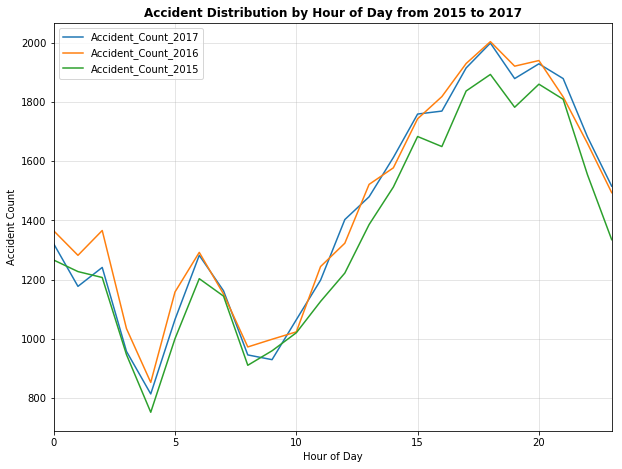

In [27]:
# Plotting 3 years trending in one figure

fig = df_combined.plot.line(x='HOUR', figsize=(10,7.5))
fig.set_xlabel('Hour of Day',fontsize=10)
fig.set_ylabel('Accident Count',fontsize=10)
# fig.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.25)
fig.grid(alpha=0.4)
plt.title('Accident Distribution by Hour of Day from 2015 to 2017', size=12, weight='bold')
plt.show()

In [43]:
# Add two columns: Weekend and Weekday to compare the # of accidents
# Group by Hour of Day, and Calculate accident counts
# Remove HOUR = 99 from dataframe

df2016_wd = accident2016[(accident2016['DAY_WEEK'] != 1) & (accident2016['DAY_WEEK'] != 7)].groupby([accident2016.HOUR]).agg({'HOUR':'count'})
df2016_we = accident2016[(accident2016['DAY_WEEK'] == 1) | (accident2016['DAY_WEEK'] == 7)].groupby([accident2016.HOUR]).agg({'HOUR':'count'})
df2016_wd.columns = ['Weekday_Accident_Count_2016']
df2016_we.columns = ['Weekend_Accident_Count_2016']
df2016_wd = df2016_wd.reset_index()
df2016_we = df2016_we.reset_index()
df2016_wd = df2016_wd[df2016_wd['HOUR'] != 99]
df2016_we = df2016_we[df2016_we['HOUR'] != 99]
print(df2016_wd)
print(df2016_we)

df2017_wd = accident2017[(accident2017['DAY_WEEK'] != 1) & (accident2017['DAY_WEEK'] != 7)].groupby([accident2017.HOUR]).agg({'HOUR':'count'})
df2017_we = accident2017[(accident2017['DAY_WEEK'] == 1) | (accident2017['DAY_WEEK'] == 7)].groupby([accident2017.HOUR]).agg({'HOUR':'count'})
df2017_wd.columns = ['Weekday_Accident_Count_2017']
df2017_we.columns = ['Weekend_Accident_Count_2017']
df2017_wd = df2017_wd.reset_index()
df2017_we = df2017_we.reset_index()
df2017_wd = df2017_wd[df2017_wd['HOUR'] != 99]
df2017_we = df2017_we[df2017_we['HOUR'] != 99]
print(df2017_wd)
print(df2017_we)

df2015_wd = accident2015[(accident2015['day_of_week'] != 1) & (accident2015['day_of_week'] != 7)].groupby([accident2015.hour_of_crash]).agg({'hour_of_crash':'count'})
df2015_we = accident2015[(accident2015['day_of_week'] == 1) | (accident2015['day_of_week'] == 7)].groupby([accident2015.hour_of_crash]).agg({'hour_of_crash':'count'})
df2015_wd.columns = ['Weekday_Accident_Count_2015']
df2015_we.columns = ['Weekend_Accident_Count_2015']
df2015_wd = df2015_wd.reset_index()
df2015_we = df2015_we.reset_index()
df2015_wd = df2015_wd[df2015_wd['hour_of_crash'] != 99]
df2015_we = df2015_we[df2015_we['hour_of_crash'] != 99]
df2015_wd = df2015_wd.rename(columns = {'hour_of_crash':'HOUR'})
df2015_we = df2015_we.rename(columns = {'hour_of_crash':'HOUR'})
print(df2015_wd)
print(df2015_we)

    HOUR  Weekday_Accident_Count_2015
0      0                          657
1      1                          620
2      2                          525
3      3                          419
4      4                          412
5      5                          682
6      6                          906
7      7                          901
8      8                          699
9      9                          701
10    10                          716
11    11                          782
12    12                          862
13    13                         1022
14    14                         1070
15    15                         1205
16    16                         1165
17    17                         1288
18    18                         1309
19    19                         1200
20    20                         1194
21    21                         1198
22    22                         1037
23    23                          862
    HOUR  Weekend_Accident_Count_2015
0      0    

In [44]:
# Combine relevant columns from 2015 to 2017 three datasets into one dataframe

df_combined_wd = pd.merge(pd.merge(df2017_wd,df2016_wd,on='HOUR'),df2015_wd,on='HOUR')
df_combined_we = pd.merge(pd.merge(df2017_we,df2016_we,on='HOUR'),df2015_we,on='HOUR')
print(df_combined_wd)
print(df_combined_we)

    HOUR  Weekday_Accident_Count_2017  Weekday_Accident_Count_2016  \
0      0                          725                          725   
1      1                          577                          635   
2      2                          580                          618   
3      3                          467                          487   
4      4                          443                          477   
5      5                          752                          806   
6      6                          993                          994   
7      7                          915                          909   
8      8                          729                          721   
9      9                          688                          724   
10    10                          780                          734   
11    11                          882                          874   
12    12                         1000                          931   
13    13            

In [52]:
# Calculate the 2015 to 2017 mean value of # of accidents during weekends and weekdays
# Combining the mean value columns to one table
df_combined_wd['Average_Accident_Count_in_Weekday'] = df_combined_wd[['Weekday_Accident_Count_2017',
                                                                     'Weekday_Accident_Count_2016',
                                                                     'Weekday_Accident_Count_2015']].mean(axis=1)
df_combined_wd

df_combined_we['Average_Accident_Count_in_Weekend'] = df_combined_we[['Weekend_Accident_Count_2017',
                                                                     'Weekend_Accident_Count_2016',
                                                                     'Weekend_Accident_Count_2015']].mean(axis=1)
df_combined_we

df_wd_we = pd.merge(df_combined_wd,df_combined_we,on='HOUR').drop(['Weekday_Accident_Count_2017',
                                                                  'Weekday_Accident_Count_2016',
                                                                  'Weekday_Accident_Count_2015',
                                                                  'Weekend_Accident_Count_2017',
                                                                  'Weekend_Accident_Count_2016',
                                                                  'Weekend_Accident_Count_2015'], axis=1)
df_wd_we

df_combined_all = pd.merge(df_combined,df_wd_we,on='HOUR')
df_combined_all

,HOUR,Accident_Count_2017,Accident_Count_2016,Accident_Count_2015,Average_Accident_Count_in_Weekday,Average_Accident_Count_in_Weekend
0,0,1321,1365,1266,702.333333,615.000000
1,1,1177,1282,1227,610.666667,618.000000
2,2,1241,1366,1207,574.333333,697.000000
3,3,957,1034,946,457.666667,521.333333
4,4,813,852,751,444.000000,361.333333
5,5,1065,1158,1000,746.666667,327.666667
6,6,1282,1292,1203,964.333333,294.666667
7,7,1162,1151,1144,908.333333,244.000000
8,8,945,972,910,716.333333,226.000000
9,9,929,998,959,704.333333,257.666667


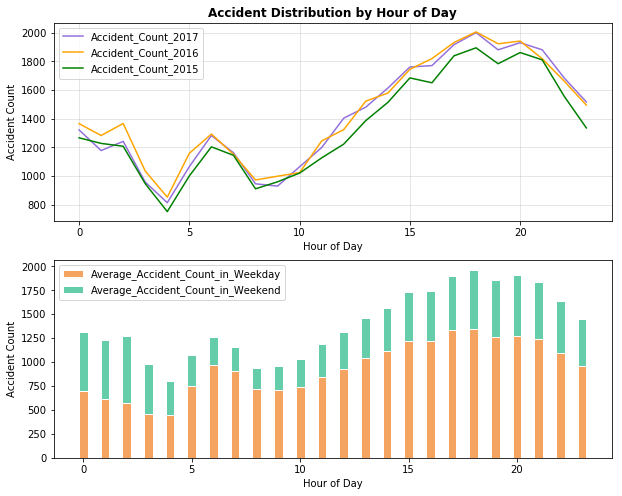

In [84]:
# Plotting 3 years trending in one figure, and stacking weekend + weekday data together

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,8))
ax1.plot('HOUR', 'Accident_Count_2017', data=df_combined_all, color='mediumpurple')
ax1.plot('HOUR', 'Accident_Count_2016', data=df_combined_all, color='orange')
ax1.plot('HOUR', 'Accident_Count_2015', data=df_combined_all, color='green')
ax1.grid(alpha=0.4)
ax1.set_xlabel('Hour of Day',fontsize=10)
ax1.set_ylabel('Accident Count',fontsize=10)
ax1.set_title('Accident Distribution by Hour of Day', size=12, weight='bold')
ax1.legend()

ax2.bar(df_combined_all['HOUR'], 'Average_Accident_Count_in_Weekday', data=df_combined_all, width=0.4, 
        edgecolor='white', label='Average_Accident_Count_in_Weekday', color='sandybrown')
ax2.bar(df_combined_all['HOUR'], 'Average_Accident_Count_in_Weekend', data=df_combined_all, width=0.4, 
        bottom=df_combined_all['Average_Accident_Count_in_Weekday'], edgecolor='white', 
        color='mediumaquamarine', label='Average_Accident_Count_in_Weekend')
ax2.set_xlabel('Hour of Day',fontsize=10)
ax2.set_ylabel('Accident Count',fontsize=10)
ax2.legend()

plt.show()

# 5. Compare Drunk Driver involvement rate across Year 2016

In [114]:
# Conduct sanity check on number_of_drunk_drivers columns in 2016 

accident2016.columns
accident2016.DRUNK_DR.describe()
accident2016.DRUNK_DR.unique()


Index(['STATE', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS',
       'PERNOTMVIT', 'PERMVIT', 'PERSONS', 'COUNTY', 'CITY', 'DAY', 'MONTH',
       'YEAR', 'DAY_WEEK', 'HOUR', 'MINUTE', 'NHS', 'RUR_URB', 'FUNC_SYS',
       'RD_OWNER', 'ROUTE', 'TWAY_ID', 'TWAY_ID2', 'MILEPT', 'LATITUDE',
       'LONGITUD', 'SP_JUR', 'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2',
       'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'WEATHER1', 'WEATHER2',
       'WEATHER', 'SCH_BUS', 'RAIL', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR',
       'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'CF1', 'CF2', 'CF3', 'FATALS',
       'DRUNK_DR'],
      dtype='object')

In [119]:
# Filter 2016 accident dataframe by whether there are drunk drivers involved 
# Group by Month, and Calculate accident counts

df2016_drunk = accident2016[accident2016['DRUNK_DR'] > 0].groupby(accident2016.MONTH).agg({'MONTH':'count'})
df2016_drunk.columns = ['Accident_Count_2016_Drunk']
df2016_drunk = df2016_drunk.reset_index()
df2016_drunk

df2016_ndrunk = accident2016[accident2016['DRUNK_DR'] == 0].groupby(accident2016.MONTH).agg({'MONTH':'count'})
df2016_ndrunk.columns = ['Accident_Count_2016_No_Drunk']
df2016_ndrunk = df2016_ndrunk.reset_index()
df2016_ndrunk

df2016_month = pd.merge(df2016_drunk, df2016_ndrunk, on='MONTH')
df2016_month

,MONTH,Accident_Count_2016_Drunk,Accident_Count_2016_No_Drunk
0,1,629,1725
1,2,644,1782
2,3,749,1945
3,4,779,1934
4,5,854,2151
5,6,821,2204
6,7,889,2136
7,8,811,2323
8,9,831,2323
9,10,856,2431


In [120]:
# Filter 2016 accident dataframe by whether there are drunk drivers involved 
# Group by Day of Week, and Calculate accident counts

df2016_drunk2 = accident2016[accident2016['DRUNK_DR'] > 0].groupby(accident2016.DAY_WEEK).agg({'DAY_WEEK':'count'})
df2016_drunk2.columns = ['Accident_Count_2016_Drunk']
df2016_drunk2 = df2016_drunk2.reset_index()
df2016_drunk2

df2016_ndrunk2 = accident2016[accident2016['DRUNK_DR'] == 0].groupby(accident2016.DAY_WEEK).agg({'DAY_WEEK':'count'})
df2016_ndrunk2.columns = ['Accident_Count_2016_No_Drunk']
df2016_ndrunk2 = df2016_ndrunk2.reset_index()
df2016_ndrunk2

df2016_week = pd.merge(df2016_drunk2, df2016_ndrunk2, on='DAY_WEEK')
df2016_week

,DAY_WEEK,Accident_Count_2016_Drunk,Accident_Count_2016_No_Drunk
0,1,2009,3344
1,2,968,3569
2,3,772,3385
3,4,909,3530
4,5,1030,3676
5,6,1372,4025
6,7,2246,3913


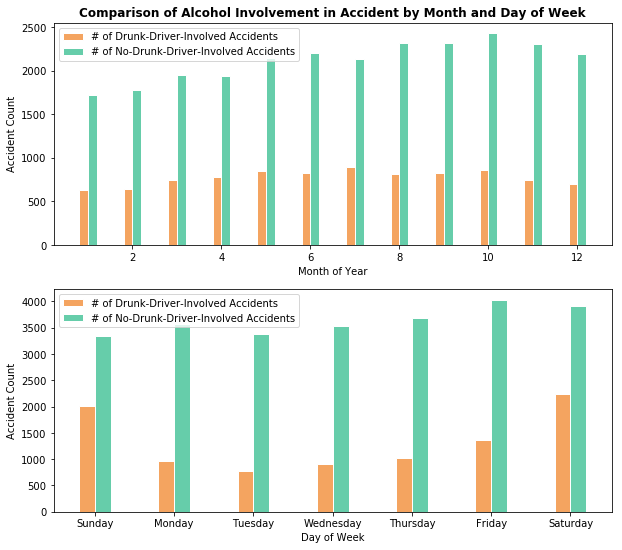

In [133]:
# Plotting # of accidents by month and day-of-week to compare alcohol involvement in accidents 

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,9))

ax1.bar(df2016_month['MONTH']-0.1, 'Accident_Count_2016_Drunk', data=df2016_month, width=0.2, 
        edgecolor='white', label='# of Drunk-Driver-Involved Accidents', color='sandybrown')
ax1.bar(df2016_month['MONTH']+0.1, 'Accident_Count_2016_No_Drunk', data=df2016_month, width=0.2, 
        edgecolor='white', label='# of No-Drunk-Driver-Involved Accidents', color='mediumaquamarine')
ax1.set_xlabel('Month of Year',fontsize=10)
ax1.set_ylabel('Accident Count',fontsize=10)
ax1.set_title('Comparison of Alcohol Involvement in Accident by Month and Day of Week', size=12, weight='bold')
ax1.legend()

ax2.bar(df2016_week['DAY_WEEK']-0.1, 'Accident_Count_2016_Drunk', data=df2016_week, width=0.2, 
        edgecolor='white', label='# of Drunk-Driver-Involved Accidents', color='sandybrown')
ax2.bar(df2016_week['DAY_WEEK']+0.1, 'Accident_Count_2016_No_Drunk', data=df2016_week, width=0.2, 
        edgecolor='white', label='# of No-Drunk-Driver-Involved Accidents', color='mediumaquamarine')
ax2.set_xlabel('Day of Week',fontsize=10)
labels = ['','Sunday', 'Monday','Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday']
ax2.set_xticklabels(labels)
ax2.set_ylabel('Accident Count',fontsize=10)
ax2.legend()

# fig.set_title('Comparison of Alcohol Involvement in Accident by Month and Day of Week', size=12, weight='bold')
plt.show()


# 6. Compare Accident Rate under Different Weather/Light Conditions in 2016

In [142]:
# loading a more comprehensive 2016 dataset to begin data analysis

accident2016_full = pd.read_csv("./FARS2016NationalCSV/accident2016.csv")

In [156]:
# Conduct sanity check on weather, light columns in 2016 

accident2016_full.columns
# columns interested: atmospheric_conditions_1_name, atmospheric_conditions_2_name, 
#                     atmospheric_conditions_name, light_condition_name
accident2016_full.atmospheric_conditions_name.describe()
accident2016_full.atmospheric_conditions_name.unique()

accident2016_full.light_condition_name.unique()
# for atmospheric_conditions_name, need to remove 'Unknown' or 'Not Reported' from the analyzed dataset
# for light_condition_name, need to remove 'Unknown' or 'Not Reported' from the analyzed dataset

Index(['Unnamed: 0', 'state_number', 'state_name', 'consecutive_number',
       'number_of_vehicle_forms_submitted_all',
       'number_of_motor_vehicles_in_transport_mvit',
       'number_of_parked_working_vehicles',
       'number_of_forms_submitted_for_persons_not_in_motor_vehicles',
       'number_of_persons_not_in_motor_vehicles_in_transport_mvit',
       'number_of_persons_in_motor_vehicles_in_transport_mvit',
       'number_of_forms_submitted_for_persons_in_motor_vehicles', 'county',
       'city', 'day_of_crash', 'month_of_crash', 'year_of_crash',
       'day_of_week', 'hour_of_crash', 'minute_of_crash',
       'national_highway_system', 'land_use', 'land_use_name',
       'functional_system', 'functional_system_name', 'ownership',
       'ownership_name', 'route_signing', 'route_signing_name',
       'trafficway_identifier', 'trafficway_identifier_2', 'milepoint',
       'latitude', 'longitude', 'special_jurisdiction',
       'special_jurisdiction_name', 'first_harmful_event',

In [158]:
# filter out 'Unknown' and 'Not Reported' records
# group by atmospheric_conditions_name and light_condition_name
# count their # of accidents and # of fatalities in 2016

df2016_weather = accident2016_full[(accident2016_full['atmospheric_conditions_name'] != 'Unknown') & 
                                   (accident2016_full['atmospheric_conditions_name'] != 'Not Reported') &
                                   (accident2016_full['light_condition_name'] != 'Not Reported') &
                                   (accident2016_full['light_condition_name'] != 'Unknown')]
df2016_weather = df2016_weather.groupby([accident2016_full.atmospheric_conditions_name, 
                                         accident2016_full.light_condition_name]).agg({
                                                                                    'consecutive_number':'count',
                                                                                    'number_of_fatalities':'sum'})
df2016_weather = df2016_weather.rename(columns={'consecutive_number':'Accident_Count'})
df2016_weather = df2016_weather.reset_index()
df2016_weather

,atmospheric_conditions_name,light_condition_name,Accident_Count,number_of_fatalities
0,"Blowing Sand, Soil, Dirt",Dark – Lighted,1,1
1,"Blowing Sand, Soil, Dirt",Dark – Not Lighted,3,4
2,"Blowing Sand, Soil, Dirt",Dawn,1,1
3,"Blowing Sand, Soil, Dirt",Daylight,12,14
4,Blowing Snow,Dark – Lighted,1,1
5,Blowing Snow,Dark – Not Lighted,6,7
6,Blowing Snow,Daylight,6,7
7,Clear,Dark – Lighted,5074,5436
8,Clear,Dark – Not Lighted,6714,7394
9,Clear,Dark – Unknown Lighting,133,140


In [169]:
# Combine "Dark – Lighted", "Dark – Not Lighted", and "Dark – Unknown Lighting" as one level:
df2016_weather.loc[df2016_weather.loc[df2016_weather["light_condition_name"]=="Dark – Lighted"].index,
                                      "light_condition_name"]="Dark"
df2016_weather.loc[df2016_weather.loc[df2016_weather["light_condition_name"]=="Dark – Not Lighted"].index,
                                      "light_condition_name"]="Dark"
df2016_weather.loc[df2016_weather.loc[df2016_weather["light_condition_name"]=="Dark – Unknown Lighting"].index,
                                      "light_condition_name"]="Dark"
df2016_weather

,atmospheric_conditions_name,light_condition_name,Accident_Count,number_of_fatalities
0,"Blowing Sand, Soil, Dirt",Dark,1,1
1,"Blowing Sand, Soil, Dirt",Dark,3,4
2,"Blowing Sand, Soil, Dirt",Dawn,1,1
3,"Blowing Sand, Soil, Dirt",Daylight,12,14
4,Blowing Snow,Dark,1,1
5,Blowing Snow,Dark,6,7
6,Blowing Snow,Daylight,6,7
7,Clear,Dark,5074,5436
8,Clear,Dark,6714,7394
9,Clear,Dark,133,140


In [170]:
# convert the df2016_weather to a pivot table of accident counts under different light conditions and weather conditions
weather_light_accident = df2016_weather.pivot_table(index="atmospheric_conditions_name", 
                                           columns="light_condition_name", 
                                           values="Accident_Count", aggfunc=np.sum)
weather_light_accident

light_condition_name,Dark,Dawn,Daylight,Dusk,Other
atmospheric_conditions_name,,,,,
"Blowing Sand, Soil, Dirt",4.0,1.0,12.0,NaN,NaN
Blowing Snow,7.0,NaN,6.0,NaN,NaN
Clear,11921.0,381.0,12030.0,568.0,7.0
Cloudy,2354.0,112.0,2413.0,134.0,1.0
"Fog, Smog, Smoke",233.0,36.0,61.0,1.0,1.0
Freezing Rain or Drizzle,11.0,NaN,6.0,NaN,NaN
Other,26.0,NaN,17.0,1.0,2.0
Rain,1196.0,35.0,883.0,52.0,3.0
Severe Crosswinds,12.0,1.0,35.0,NaN,NaN


In [171]:
# convert the df2016_weather to a pivot table of fatalities counts under different light conditions and weather conditions
weather_light_fatal = df2016_weather.pivot_table(index="atmospheric_conditions_name", 
                                           columns="light_condition_name", 
                                           values="number_of_fatalities", aggfunc=np.sum)
weather_light_fatal

light_condition_name,Dark,Dawn,Daylight,Dusk,Other
atmospheric_conditions_name,,,,,
"Blowing Sand, Soil, Dirt",5.0,1.0,14.0,NaN,NaN
Blowing Snow,8.0,NaN,7.0,NaN,NaN
Clear,12970.0,417.0,13056.0,619.0,7.0
Cloudy,2582.0,124.0,2640.0,140.0,1.0
"Fog, Smog, Smoke",257.0,37.0,67.0,1.0,1.0
Freezing Rain or Drizzle,12.0,NaN,6.0,NaN,NaN
Other,30.0,NaN,20.0,1.0,2.0
Rain,1292.0,36.0,999.0,62.0,3.0
Severe Crosswinds,13.0,1.0,38.0,NaN,NaN


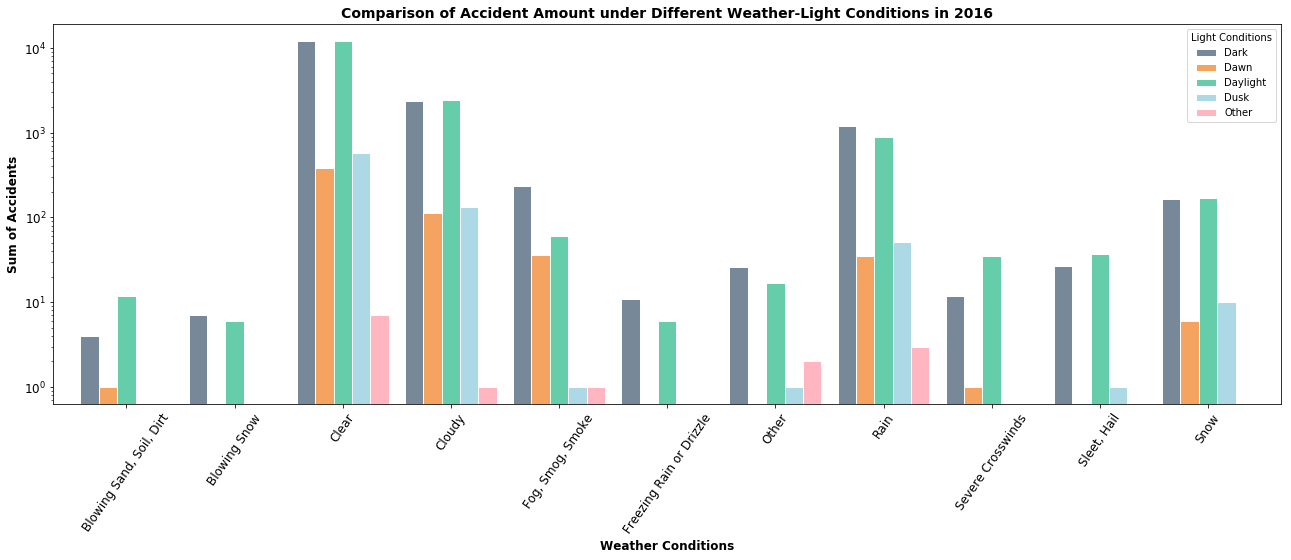

In [209]:
# plot figures based off the two dataframes

# These are the colors that will be used in the bar plot
color_seq = ['lightslategrey', 'sandybrown', 'mediumaquamarine', 'lightblue', 'lightpink']


fig = weather_light_accident.plot(kind="bar", logy=True, figsize=(22,7), width=0.85, legend="best", edgecolor='white',
                            color=color_seq, fontsize=12)
fig.set_ylabel('Sum of Accidents',fontsize=12, weight='bold')
fig.set_xlabel('Weather Conditions',fontsize=12, weight='bold')
plt.xticks(rotation=55)

fig.set_title('Comparison of Accident Amount under Different Weather-Light Conditions in 2016', size=14, weight='bold')
plt.legend(title='Light Conditions')

plt.show()

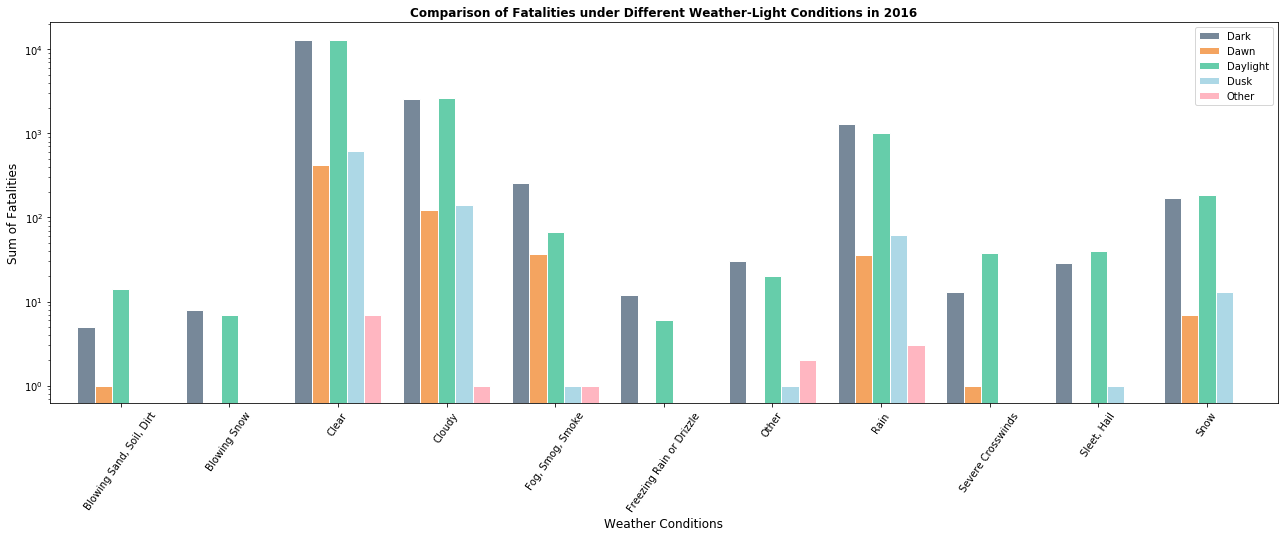

In [200]:
# plot figures based off the two dataframes

# These are the colors that will be used in the bar plot
color_seq = ['lightslategrey', 'sandybrown', 'mediumaquamarine', 'lightblue', 'lightpink']


fig = weather_light_fatal.plot(kind="bar", logy=True, figsize=(22,7), width=0.8, legend="best", edgecolor='white',
                            color=color_seq)
fig.set_ylabel('Sum of Fatalities',fontsize=12)
fig.set_xlabel('Weather Conditions',fontsize=12)
plt.xticks(rotation=55)

fig.set_title('Comparison of Fatalities under Different Weather-Light Conditions in 2016', size=12, weight='bold')
plt.legend()

plt.show()